In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
#reading files in pandas
biden = pd.read_csv("biden_tweets_retrieved.csv")
trump = pd.read_csv("tr_tweets.csv")

In [3]:
print(biden.shape,trump.shape)

(3211, 2) (121, 2)


I will take the first 121 rows of both files:

In [4]:
biden = biden[:121]

In [5]:
#checking out the files
pd.set_option("display.max_colwidth",-1)
biden.head(10)

,Unnamed: 0,tweets
0,0,"I’m in Warren, Michigan, to discuss how a Biden-Harris administration will ensure the future is made in America — by America’s workers. Tune in now: https://t.co/OzJ3Vnc8kd"
1,1,The right to vote is the most sacred American right there is — exercise it. \n\nMake your voice heard this November. https://t.co/Hy8C4n0lUk
2,2,RT @KamalaHarris: The images we’re seeing from the West Coast are absolutely horrifying. I’m eternally grateful for our brave firefighters…
3,3,President Obama and I rescued the auto industry and helped Michigan's economy come roaring back.\n\nDonald Trump squandered it — and hardworking Michiganders are paying the price every day. https://t.co/kXjyPbsj8s
4,4,"Given his track record, no one can take Trump’s word alone on a COVID-19 vaccine. But with satisfactory answers to these questions, every American can have confidence in a safe and effective COVID-19 vaccine. https://t.co/074K1HD9wf"
5,5,"3: What is the plan to allocate and distribute vaccines to Americans cost-free, safely, equitably, and without politics?\n \nPresident Trump should release a detailed distribution plan to ensure every American — not just the wealthy and well-connected — receives the vaccine."
6,6,"2: Who will validate that the Administration’s decision to greenlight a COVID-19 vaccine is driven by science and not political motivation?\n \nWe must hear uncensored statements on efficacy and safety from @FDACBER, the @US_FDA vaccine advisory committee, and Dr. Fauci."
7,7,"1: What criteria will be used to ensure a vaccine meets the scientific standard of safety and efficacy?\n\nThe FDA must clarify what criteria it will use, and President Trump must commit to respecting the independent judgment of the non-political professional staff at the FDA."
8,8,"A safe and effective COVID-19 vaccine could save countless lives. We need one as soon as possible.\n\nBut while I see a vaccine as a product of science, President Trump sees it as a political tool.\n\nPolitics should play no role in this. The Administration must answer the following:"
9,9,Donald Trump is incapable of providing the leadership this moment requires.


In [6]:
trump.head(10)

,Unnamed: 0,tweets
0,0,Congratulations @CorkyForSenate! https://t.co/NQk9w5TKde
1,1,Congratulations Matt @Mowers! https://t.co/zvQatCFYk2
2,2,"The United States Navy, or the Department of Defense, will NOT be cancelling its contract with Catholic Priests who serve our men and women in the Armed Forces so well, and with such great compassion &amp; skill. This will no longer be even a point of discussion! @CardinalDolan"
3,3,Volunteer to be a Trump Election Poll Watcher. Sign up today!\n#MakeAmericaGreatAgain\nhttps://t.co/aYYsyWFDIw
4,4,https://t.co/uwP3l4cAvG
5,5,"RT @JasonMillerinDC: 🚨@realDonaldTrump nominated for Nobel Peace Prize by Norwegian official, citing Israel-UAE peace deal🚨 \n\nhttps://t.co/…"
6,6,"RT @dcexaminer: ""Indeed, Trump has broken a 39-year-old streak of American Presidents either starting a war or bringing the United States i…"
7,7,"RT @TrumpStudents: “Just weeks after helping to broker peace between Israel and the United Arab Emirates (UAE), \n\nPresident @realDonaldTrum…"
8,8,"RT @trish_regan: A Nobel Peace Prize for Trump: Norwegian MP Nominates POTUS\n\n""The people who have received the Peace Prize in recent years…"
9,9,RT @laurenboebert: Congratulations @POTUS on the Nobel Peace Prize nomination! Hopefully the committee follows through on it. \n\nWell deserv…


In [7]:
biden = biden.iloc[:,1]
trump = trump.iloc[:,1]

## Data Cleaning

In [8]:
def get_clean(text):
    text = re.sub("#","",text) #remove hashtag symbol
    text = re.sub("@[A-Za-z0-9]+.","",text) #remove mentions
    text = text.replace("RT","") #remove RTs
    text = re.sub(r"http\S+","",text) #remove links
    text = re.sub(r"[\n\n]"," ",text)
    return text

biden_clean = biden.apply(get_clean)
biden_clean.head(10)

0    I’m in Warren, Michigan, to discuss how a Biden-Harris administration will ensure the future is made in America — by America’s workers. Tune in now:                                                                                                                                    
1    The right to vote is the most sacred American right there is — exercise it.   Make your voice heard this November.                                                                                                                                                                      
2      The images we’re seeing from the West Coast are absolutely horrifying. I’m eternally grateful for our brave firefighters…                                                                                                                                                             
3    President Obama and I rescued the auto industry and helped Michigan's economy come roaring back.  Donald Trump squandered it — and hardwo

In [9]:
trump_clean = trump.apply(get_clean)
trump_clean.head(10)

0    Congratulations                                                                                                                                                                                                                                                         
1    Congratulations Matt                                                                                                                                                                                                                                                    
2    The United States Navy, or the Department of Defense, will NOT be cancelling its contract with Catholic Priests who serve our men and women in the Armed Forces so well, and with such great compassion &amp; skill. This will no longer be even a point of discussion! 
3    Volunteer to be a Trump Election Poll Watcher. Sign up today! MakeAmericaGreatAgain                                                                                                      

In [10]:
#Removing Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
trump_clean = trump_clean.apply(remove_emoji)
biden_clean = biden_clean.apply(remove_emoji)

In [11]:
trump_final = trump_clean.copy()
biden_final = biden_clean.copy()

In [12]:
trump_final.head()

0    Congratulations                                                                                                                                                                                                                                                         
1    Congratulations Matt                                                                                                                                                                                                                                                    
2    The United States Navy, or the Department of Defense, will NOT be cancelling its contract with Catholic Priests who serve our men and women in the Armed Forces so well, and with such great compassion &amp; skill. This will no longer be even a point of discussion! 
3    Volunteer to be a Trump Election Poll Watcher. Sign up today! MakeAmericaGreatAgain                                                                                                      

In [13]:
biden_final.head()

0    I’m in Warren, Michigan, to discuss how a Biden-Harris administration will ensure the future is made in America — by America’s workers. Tune in now:                                                             
1    The right to vote is the most sacred American right there is — exercise it.   Make your voice heard this November.                                                                                               
2      The images we’re seeing from the West Coast are absolutely horrifying. I’m eternally grateful for our brave firefighters…                                                                                      
3    President Obama and I rescued the auto industry and helped Michigan's economy come roaring back.  Donald Trump squandered it — and hardworking Michiganders are paying the price every day.                      
4    Given his track record, no one can take Trump’s word alone on a COVID-19 vaccine. But with satisfactory answers to these questions, eve

Let's start for analysis!

## Sentiment Analysis

In [14]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [15]:
trump_final = pd.DataFrame(data = trump_final, columns=["tweets"])
biden_final = pd.DataFrame(data = biden_final, columns=["tweets"])

trump_final["polarity"] = trump_final["tweets"].apply(get_polarity)
trump_final["subjectivity"] = trump_final["tweets"].apply(get_subjectivity)

biden_final["polarity"] = biden_final["tweets"].apply(get_polarity)
biden_final["subjectivity"] = biden_final["tweets"].apply(get_subjectivity)

In [16]:
biden_final.head()

,tweets,polarity,subjectivity
0,"I’m in Warren, Michigan, to discuss how a Biden-Harris administration will ensure the future is made in America — by America’s workers. Tune in now:",0.000000,0.125000
1,The right to vote is the most sacred American right there is — exercise it. Make your voice heard this November.,0.267857,0.392857
2,The images we’re seeing from the West Coast are absolutely horrifying. I’m eternally grateful for our brave firefighters…,-0.050000,1.000000
3,President Obama and I rescued the auto industry and helped Michigan's economy come roaring back. Donald Trump squandered it — and hardworking Michiganders are paying the price every day.,0.000000,0.000000
4,"Given his track record, no one can take Trump’s word alone on a COVID-19 vaccine. But with satisfactory answers to these questions, every American can have confidence in a safe and effective COVID-19 vaccine.",0.366667,0.433333


In [17]:
trump_final.head()

,tweets,polarity,subjectivity
0,Congratulations,0.000000,0.00
1,Congratulations Matt,0.000000,0.00
2,"The United States Navy, or the Department of Defense, will NOT be cancelling its contract with Catholic Priests who serve our men and women in the Armed Forces so well, and with such great compassion &amp; skill. This will no longer be even a point of discussion!",0.333333,0.45
3,Volunteer to be a Trump Election Poll Watcher. Sign up today! MakeAmericaGreatAgain,0.000000,0.00
4,,0.000000,0.00


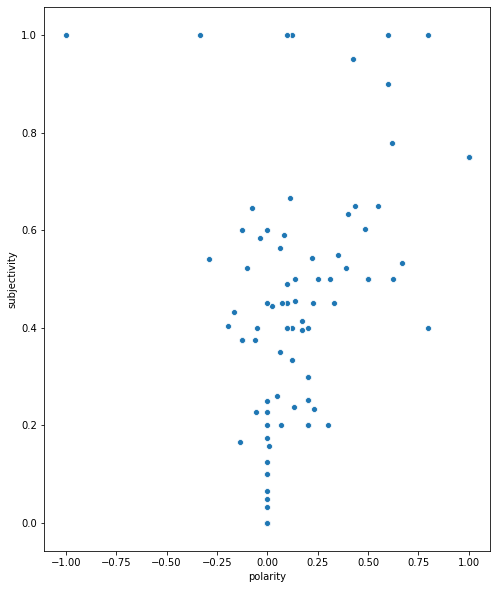

In [18]:
#Trump
plt.figure(figsize=(8,10))
sns.scatterplot(data=trump_final,x=trump_final["polarity"],y=trump_final["subjectivity"])

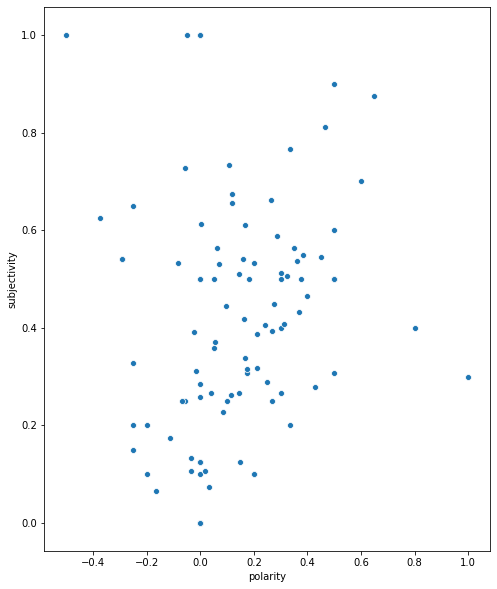

In [19]:
#Biden
plt.figure(figsize=(8,10))
sns.scatterplot(data=biden_final,x=biden_final["polarity"],y=biden_final["subjectivity"])

**Both candidates seem to spread a positive sentiment in their tweets more comparing to negative ones.**

In [20]:
def get_analysis(score):
    if score == 0:
        return "neutral"
    elif score <0:
        return "negative"
    else:
        return "positive"

biden_final["analysis"] = biden_final["polarity"].apply(get_analysis)
trump_final["analysis"] = trump_final["polarity"].apply(get_analysis)

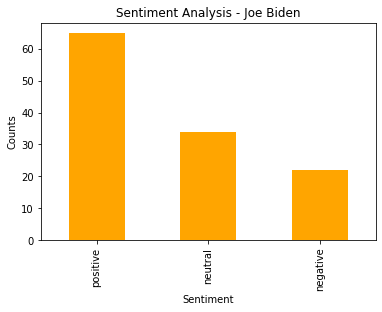

In [68]:
plt.title("Sentiment Analysis - Joe Biden")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
biden_final["analysis"].value_counts().plot(kind="bar",color="orange")
plt.show()

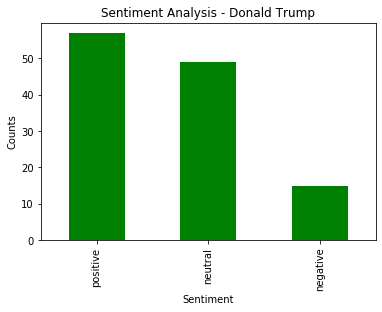

In [69]:
plt.title("Sentiment Analysis - Donald Trump")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
trump_final["analysis"].value_counts().plot(kind="bar",color="green")
plt.show()

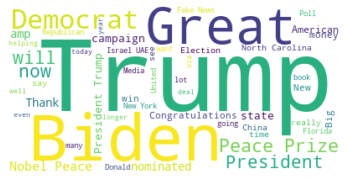

In [22]:
#WordCloud
all_trump = " ".join([twts for twts in trump_final["tweets"]])
wordCloud = WordCloud(background_color="white",max_words=50,mode="RGBA",random_state=21,max_font_size=119).generate(all_trump)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**That's interesting**: One of the most repeated words in Trump's userline is the word "Trump". Since account names are not included and cleaned in the text files, the only reason that Trump word is repeated is probably that his retweeting the tweets that were written about himself by others - such as news accounts or individiual accounts. After the word "Trump", these words are following: Biden, Great, Democrat, Peace, Prize, President, Nobel Peace. Another interesting thing is that he texted "Democrat" more than "Republican".

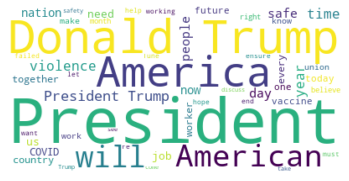

In [23]:
all_biden = " ".join([twts for twts in biden_final["tweets"]])
wordCloud = WordCloud(background_color="white",max_words=50,mode="RGBA",random_state=21,max_font_size=119).generate(all_biden)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Biden's top words are "President", "Donald Trump" and "America". "Violence", "vaccine", "COVID", "union", "job" are the other words that he used recently - he might be pointing out the current issues that USA as well as other countries are facing now and he is doing so by calling out president Donald Trump.